<a href="https://colab.research.google.com/github/Laaliji/Colon-Cancer-Gene-Expression-Data-Classification-Analysis/blob/main/TP1_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activité pratique 1 : Méthodologie de Recherche : Analyse de l'Expression des Gènes du Cancer du Côlon

## Bibliothèques et Configurations

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Préparation des données

### Exploratory data analysis (EDA)

In [ ]:
#Charger les données
df = pd.read_csv('colon_cancer.csv', sep=';')

In [ ]:
# Aperçu général sur le dataset
print("\nInformations sur le dataset: ")
print(df.info())
print("Aperçu des données: ")
print(df.head(5))


Informations sur le dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_sample      804 non-null    object 
 1   ADH1C          804 non-null    float64
 2   DHRS11         804 non-null    float64
 3   UGP2           804 non-null    float64
 4   SLC7A5         804 non-null    float64
 5   CTSS           804 non-null    float64
 6   DAO            804 non-null    float64
 7   NIBAN1         804 non-null    float64
 8   PRUNE2         804 non-null    float64
 9   FOXF2          804 non-null    float64
 10  TENT5C         804 non-null    float64
 11  KLF10          804 non-null    float64
 12  FABP1          804 non-null    float64
 13  RPSAP19        804 non-null    float64
 14  NCAPH          804 non-null    float64
 15  TPM1           804 non-null    float64
 16  PLA2G12B       804 non-null    float64
 17  PLAAT4         804 non-


Valeurs manquantes par colonne :
id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
CTSS             0
DAO              0
NIBAN1           0
PRUNE2           0
FOXF2            0
TENT5C           0
KLF10            0
FABP1            0
RPSAP19          0
NCAPH            0
TPM1             0
PLA2G12B         0
PLAAT4           0
IGLV8-61         0
GSS              0
L1TD1            0
RNF186           0
HES2             0
MXRA8            0
SOX18            0
NDFIP2           0
SIAE             0
NEURL1B          0
DDIT4            0
TRPM4            0
RETREG1          0
OTULINL          0
CPVL             0
SAMD9            0
ANKRD40CL        0
EPN3             0
CRYBG2           0
GIPC2            0
P3H2             0
STEAP3           0
THNSL2           0
TRAPPC14         0
RHBDL2           0
RPP25            0
SEMA4C           0
RNF43            0
EPS8L1           0
TOR4A            0
PAQR5            0
SIDT1            0
ESRP1           

<Axes: >

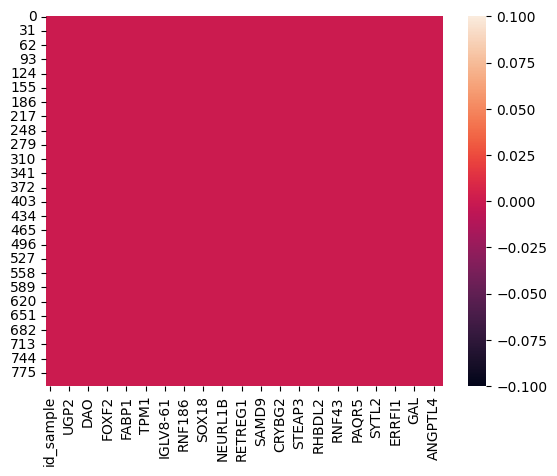

In [ ]:
# Vérifier les valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

print("\nHeatmap des valeurs manquantes :")
sns.heatmap(df.isnull())


Distribution des classes :
tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


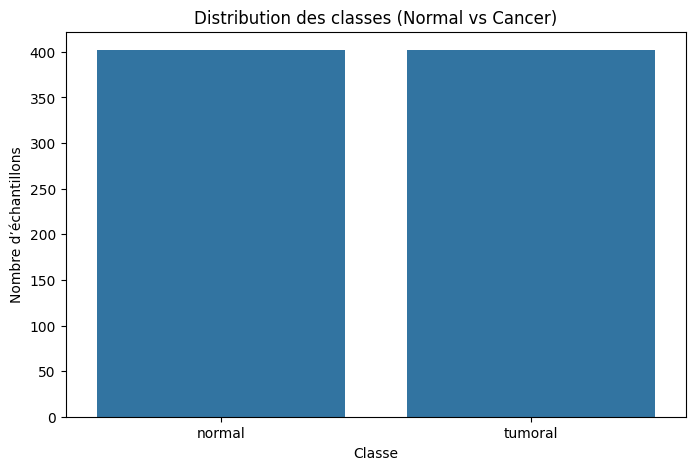


Pourcentage des classes :
tissue_status
normal     50.0
tumoral    50.0
Name: proportion, dtype: float64


In [ ]:
# Compte des classes
print("\nDistribution des classes :")
print(df["tissue_status"].value_counts())

# Visualisation
plt.figure(figsize=(8, 5))
sns.countplot(x="tissue_status", data=df)
plt.title("Distribution des classes (Normal vs Cancer)")
plt.xlabel("Classe")
plt.ylabel("Nombre d’échantillons")
plt.show()

# Pourcentage
print("\nPourcentage des classes :")
print(df["tissue_status"].value_counts(normalize=True) * 100)

In [ ]:
#Analyse descriptive
# Supprime id_sample pour les stats (inutile)
features = df.drop(columns=["id_sample", "tissue_status"])

# Statistiques descriptives
print("\nStatistiques descriptives des gènes avant standardisation:")
print(features.describe())



Statistiques descriptives des gènes avant standardisation:
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO      NIBAN1      PRUNE2       FOXF2      TENT5C       KLF10       FABP1     RPSAP19       NCAPH        TPM1    PLA2G12B      PLAAT4    IGLV8-61         GSS       L1TD1      RNF186        HES2       MXRA8       SOX18      NDFIP2        SIAE     NEURL1B       DDIT4       TRPM4     RETREG1     OTULINL        CPVL       SAMD9   ANKRD40CL        EPN3      CRYBG2       GIPC2        P3H2      STEAP3      THNSL2    TRAPPC14      RHBDL2       RPP25      SEMA4C       RNF43      EPS8L1       TOR4A       PAQR5       SIDT1       ESRP1       SYTL2       BSPRY       CDHR2      ERRFI1       CLIC5        PLLP         GAL       CRYL1        YBX2     ANGPTL4
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000  804

**Problème:** Les gènes ont des échelles très différentes. Par exemple, FABP1 a une moyenne de 8.036 et un écart-type de 3.021, tandis que PLLP a une moyenne de 1.823 et un écart-type de 0.722. Si on ne standardise pas, un gène comme FABP1 (avec de grandes valeurs) dominera les calculs simplement à cause de son échelle, même s’il n’est pas plus "important".

**Solution proposée:** La standardisation ramène toutes les variables à la même échelle (moyenne = 0, écart-type = 1). Ainsi, un changement d’une unité dans FABP1 a le même "poids" qu’un changement d’une unité dans PLLP, ce qui permet au modèle de comparer leur influence de manière équitable.

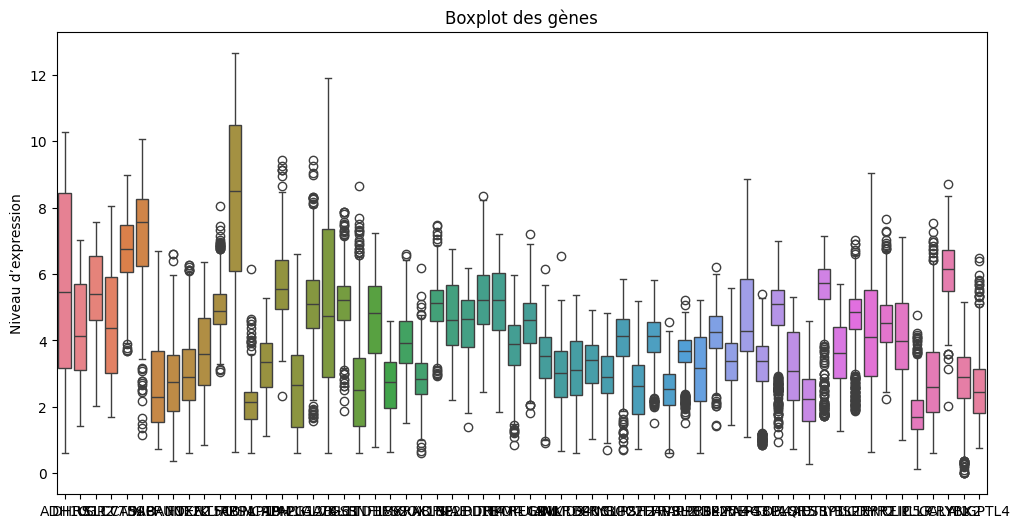

In [ ]:
#Visualisation de la distribution des expressions des gènes et les outliers avec le boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.title("Boxplot des gènes")
plt.ylabel("Niveau d’expression")
plt.show()

In [ ]:
# Analyse des outliers pour chaque gène en utilisant la méthode de l'écart interquartile (IQR)
# On calcule Q1 (25e percentile) et Q3 (75e percentile), puis l'IQR (Q3 - Q1).
# Les outliers sont définis comme les valeurs < Q1 - 1.5*IQR ou > Q3 + 1.5*IQR.
for gene in features.columns:
    Q1 = features[gene].quantile(0.25)
    Q3 = features[gene].quantile(0.75)
    IQR = Q3 - Q1
    outliers = features[(features[gene] < (Q1 - 1.5 * IQR)) | (features[gene] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Gène {gene} : {len(outliers)} outliers")

Gène CTSS : 5 outliers
Gène DAO : 15 outliers
Gène PRUNE2 : 3 outliers
Gène FOXF2 : 7 outliers
Gène KLF10 : 23 outliers
Gène RPSAP19 : 16 outliers
Gène TPM1 : 8 outliers
Gène PLAAT4 : 25 outliers
Gène GSS : 26 outliers
Gène L1TD1 : 19 outliers
Gène MXRA8 : 2 outliers
Gène SOX18 : 10 outliers
Gène NDFIP2 : 13 outliers
Gène NEURL1B : 1 outliers
Gène DDIT4 : 1 outliers
Gène RETREG1 : 8 outliers
Gène OTULINL : 5 outliers
Gène CPVL : 3 outliers
Gène SAMD9 : 1 outliers
Gène CRYBG2 : 1 outliers
Gène GIPC2 : 16 outliers
Gène STEAP3 : 18 outliers
Gène THNSL2 : 2 outliers
Gène TRAPPC14 : 41 outliers
Gène RPP25 : 11 outliers
Gène EPS8L1 : 41 outliers
Gène TOR4A : 76 outliers
Gène ESRP1 : 73 outliers
Gène BSPRY : 68 outliers
Gène ERRFI1 : 11 outliers
Gène PLLP : 19 outliers
Gène GAL : 12 outliers
Gène CRYL1 : 7 outliers
Gène YBX2 : 20 outliers
Gène ANGPTL4 : 17 outliers


Le boxplot des niveaux d’expression des 60 gènes met en évidence une forte variabilité entre les variables, avec des échelles allant de 0-4 pour des gènes comme ANGPTL4 à 0-12 pour FABP1, et des écarts-types variant de 0.722 (PLLP) à 3.021 (FABP1), soulignant la nécessité d’une standardisation. De nombreux outliers, notamment pour TOR4A (76 outliers), ESRP1 (73 outliers), et ADH1C, confirmés par l’analyse IQR, risquent de biaiser la régression logistique en favorisant les gènes à grandes échelles et en déformant la frontière de décision. Pour y remédier, On propose de standardiser les données avec StandardScaler pour centrer et réduire les valeurs, de gérer les outliers par suppression ou transformation (ex. winsorisation) pour les gènes les plus affectés, et d’explorer des boxplots groupés par tissue_status afin d’identifier les gènes discriminants, assurant ainsi un modèle robuste et des prédictions fiables.

### Normalisation et Séparation des données

In [ ]:
#Séparer les features (gènes) et la cible (tissue_status : Normal/Cancer)
X = df.drop(columns=['id_sample', 'tissue_status'])  # Features : tous les gènes
y = df['tissue_status'] #Normal ou Cancer

In [ ]:
#Diviser en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Standardisation de l'ensemble d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Analyse descriptive après standardiser
print("\nStatistiques descriptives des gènes après standardisation :")
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print((df_X_train_scaled.describe()))


Statistiques descriptives des gènes après standardisation :
              ADH1C        DHRS11          UGP2        SLC7A5          CTSS           DAO        NIBAN1        PRUNE2         FOXF2        TENT5C         KLF10         FABP1       RPSAP19         NCAPH          TPM1      PLA2G12B        PLAAT4      IGLV8-61           GSS         L1TD1        RNF186          HES2         MXRA8         SOX18        NDFIP2          SIAE       NEURL1B         DDIT4         TRPM4       RETREG1       OTULINL          CPVL         SAMD9     ANKRD40CL          EPN3        CRYBG2         GIPC2          P3H2        STEAP3        THNSL2      TRAPPC14        RHBDL2         RPP25        SEMA4C         RNF43        EPS8L1         TOR4A         PAQR5         SIDT1         ESRP1         SYTL2         BSPRY         CDHR2        ERRFI1         CLIC5          PLLP           GAL         CRYL1          YBX2       ANGPTL4
count  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.430000e+02  6.

- Après standardisation, tous les gènes ont une moyenne de 0 et un écart-type de 1, ce qui les met sur la même échelle pour une analyse équitable avec la régression logistique.

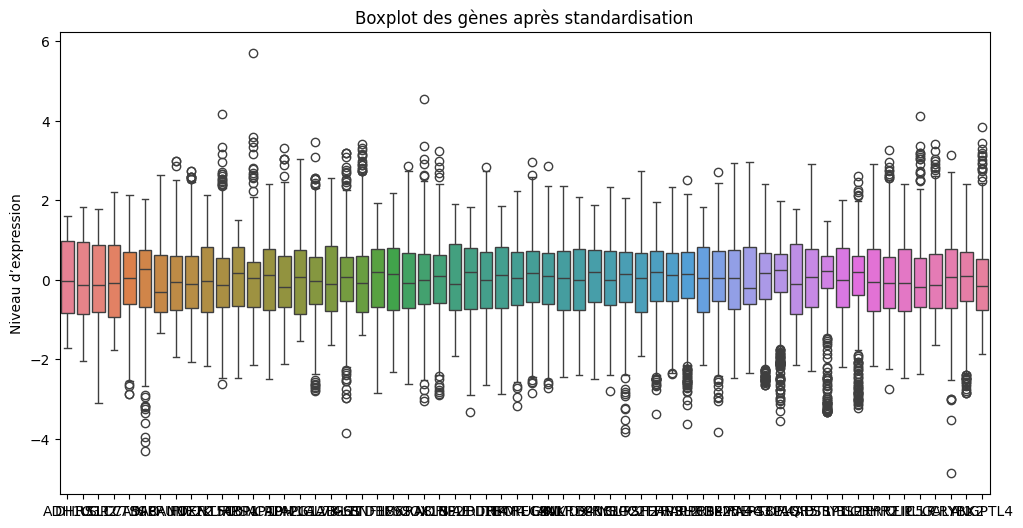

In [ ]:
#Boxplot après standardiser
plt.figure(figsize=(12, 6))
sns.boxplot(df_X_train_scaled)
plt.title("Boxplot des gènes après standardisation")
plt.ylabel("Niveau d’expression")
plt.show()

## Entraînement du modèle

In [ ]:
#Entraîner le modèle de régression logistique
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter augmenté pour convergence
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Faire des prédictions
y_pred = model.predict(X_test_scaled)

## Evaluation du modèle

In [ ]:
#Evaluation du modèle
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
print("Matrice de confusion :")
print(conf_matrix)

Matrice de confusion :
[[80  0]
 [ 0 81]]


<Figure size 800x600 with 0 Axes>

In [ ]:
# Rapport de classification (précision, recall, F1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        80
     tumoral       1.00      1.00      1.00        81

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



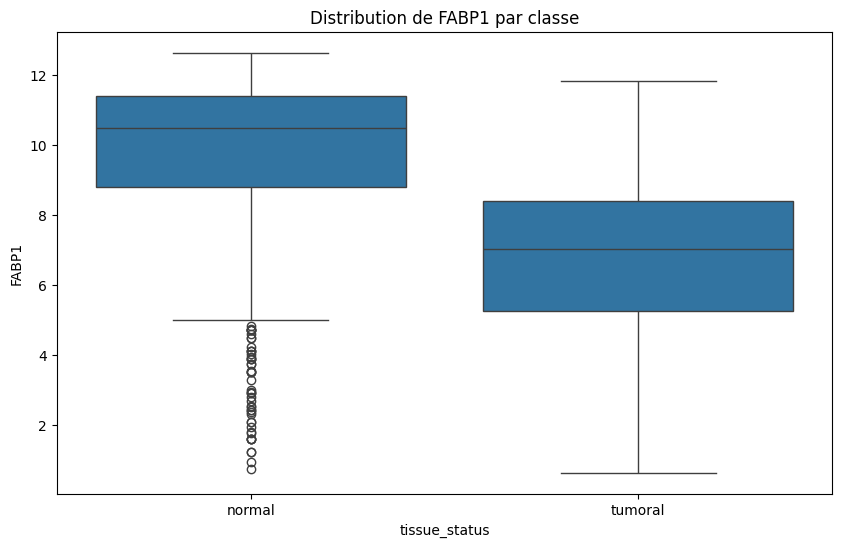

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tissue_status', y='FABP1', data=df)
plt.title("Distribution de FABP1 par classe")
plt.show()

Le modèle de régression logistique appliqué sur ce jeu de données d'expression génique pour classer les tissus "normal" et "tumoral" a obtenu une performance parfaite, avec une accuracy de 1.0, une précision, un rappel et un F1-score de 1.0 pour les deux classes, sur un ensemble de test équilibré de 161 échantillons (80 "normal" et 81 "tumoral"). Cette performance exceptionnelle s'explique par une séparation nette des classes, comme illustré par le boxplot de FABP1, qui montre des distributions disjointes entre les tissus normaux (médiane ~10) et tumoraux (médiane ~6), suggérant que les gènes sélectionnés dans ce dataset sont très discriminants. La standardisation a permis d'uniformiser les échelles des gènes, renforçant l'efficacité du modèle, mais cette perfection indique probablement un dataset synthétique ou simplifié, car une telle précision est rare dans des données biologiques réelles où du bruit et des chevauchements sont attendus. Pour confirmer la robustesse de ces résultats, une validation croisée et une analyse des coefficients des gènes les plus influents, comme FABP1, seraient nécessaires afin d’évaluer la généralisation du modèle à de nouvelles données.

In [ ]:
# Validation croisée pour évaluer la robustesse
print("\nValidation croisée (5 folds) sur l'ensemble d'entraînement :")
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Scores par fold :", scores)
print("Moyenne des scores :", scores.mean())
print("Écart-type des scores :", scores.std())

# Analyse des coefficients des gènes les plus influents
coef_df = pd.DataFrame({
    'Gène': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nTop 10 des gènes les plus influents (par valeur absolue du coefficient) :")
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10))


Validation croisée (5 folds) sur l'ensemble d'entraînement :
Scores par fold : [1. 1. 1. 1. 1.]
Moyenne des scores : 1.0
Écart-type des scores : 0.0

Top 10 des gènes les plus influents (par valeur absolue du coefficient) :
       Gène  Coefficient
44    RNF43     0.945012
3    SLC7A5     0.876286
2      UGP2    -0.718846
5       DAO    -0.672351
26  NEURL1B    -0.647466
13    NCAPH     0.536046
8     FOXF2    -0.531378
27    DDIT4     0.511566
54    CLIC5    -0.467667
0     ADH1C    -0.442681


- Chaque fold de la validation croisée (5 au total) a atteint une accuracy de 100 %, ce qui indique que le modèle a parfaitement classé les données dans toutes les combinaisons d’entraînement/validation.

- La moyenne des scores sur les 5 folds est de 1.0, confirmant une performance parfaite à travers les différents splits.

- Un écart-type de 0.0 signifie qu’il n’y a aucune variabilité entre les performances des folds, ce qui renforce l’idée d’une stabilité exceptionnelle du modèle

- Une validation croisée (5 folds) sur l’ensemble d’entraînement, avec des scores parfaits : [1. 1. 1. 1. 1.], moyenne 1.0, écart-type 0.0 suggère que le modèle n’overfit pas, car il est cohérent sur différents sous-ensembles de données.

In [ ]:
#Vérifier les données pour des fuites ou des biais
print("Doublons entre X_train et X_test :", len(set(X_train.index).intersection(X_test.index)))

Doublons entre X_train et X_test : 0


L'absence de doublons entre X_train et X_test (0 doublons) indique qu'il n'y a pas de fuite de données due à des échantillons communs entre les ensembles d'entraînement et de test, ce qui renforce la validité de l'accuracy parfaite obtenue.